In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

league_data_cleaned = pd.read_csv('data/league_data_cleaned.csv')

In [2]:
# We can extract the data in this format from pandas like this:
column_names = league_data_cleaned.columns.tolist()
column_names = column_names[1:-1]

all_inputs = league_data_cleaned[column_names].values

# Similarly, we can extract the class labels
all_labels = league_data_cleaned['blueWin'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:(len(column_names) +1)]

array([[     0,     -4,    -11,    -12,      2,      0,     -2,      0,
            -6,    -12,     12,  -5714,  -2815,  -5397],
       [     0,     -4,     20,     -5,      1,      0,      0,      0,
            -6,    -25,     22,  -1118,    210,   -768],
       [     0,     -1,   -222,     -5,     -1,      0,     -2,      0,
            -8,     -9,     12,  -2384,     37,  -4945],
       [     1,      3,      5,     -2,     -1,      1,      1,      0,
            -4,    -23,     -3,   2176,   -603,   3109],
       [     0,     -4,      4,      4,      0,      1,      0,      0,
            -2,    -12,      4,   1720,   1591,   7431],
       [     0,      1,     -9,    -12,     -2,     -1,     -3,      0,
           -13,     12,     10,  -4357,  -3550,  -8553],
       [     0,      0,   -106,      6,      2,      0,      0,      0,
            -5,    -72,      0,   -867,    744,   -306],
       [     1,      0,      7,      6,      1,      0,      0,      0,
            -6,     33,  

In [3]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
classifier.score(testing_inputs, testing_classes)

0.6706853839801816

We will experiment now 1000 times the classifier and draw a histogram of the accuracie

Decision tree took an average of 0.10300 seconds


(array([  7.,  22.,  56., 132., 208., 266., 170.,  94.,  35.,  10.]),
 array([0.65185797, 0.65530966, 0.65876135, 0.66221305, 0.66566474,
        0.66911643, 0.67256813, 0.67601982, 0.67947151, 0.6829232 ,
        0.6863749 ]),
 <BarContainer object of 10 artists>)

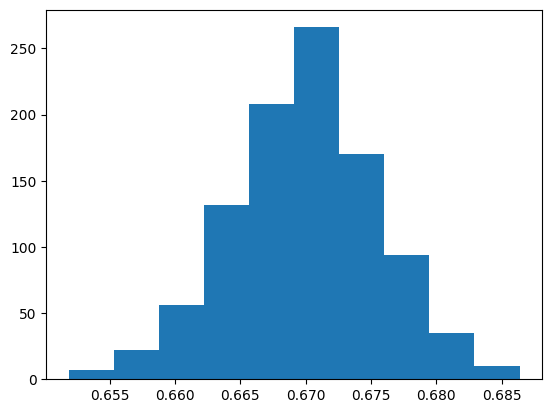

In [5]:
model_accuracies = []

times_list = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    classifier = DecisionTreeClassifier(random_state=0)

    start_time = time.time()
    classifier.fit(training_inputs, training_classes)
    end_time = time.time()

    times_list.append(end_time - start_time)

    model_accuracies.append(classifier.score(testing_inputs, testing_classes))

print("Decision tree took an average of {:.5f} seconds".format(np.mean(times_list)))

plt.hist(model_accuracies)

Text(0.5, 1.0, 'Average score: 0.6699558228288056')

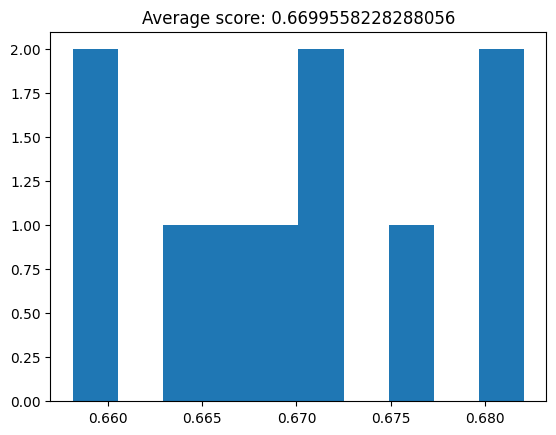

In [6]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Text(0.5, 1.0, 'Average score: 0.7499785287760447')

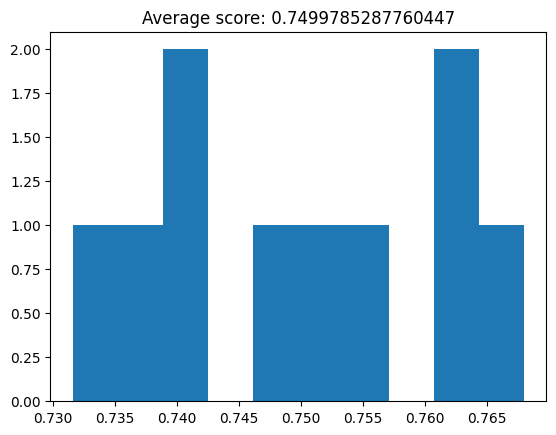

In [7]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                  'max_features': [1,2,3,4,5,6,7,8,9,10,11,12,13]}

In [9]:
# Simple GridSearch and visual representation

grid_search = GridSearchCV( decision_tree_classifier, parameter_grid)

start_time = time.time()
grid_search.fit(all_inputs, all_labels)
end_time = time.time()

print("Grid search took {} seconds".format(end_time - start_time))


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Grid search took 26.781211853027344 seconds
Best score: 0.7560898334882954
Best parameters: {'max_depth': 5, 'max_features': 10}


Confusion Matrix:
[[2066  975]
 [1008 2006]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68      3041
           1       0.67      0.67      0.67      3014

    accuracy                           0.67      6055
   macro avg       0.67      0.67      0.67      6055
weighted avg       0.67      0.67      0.67      6055



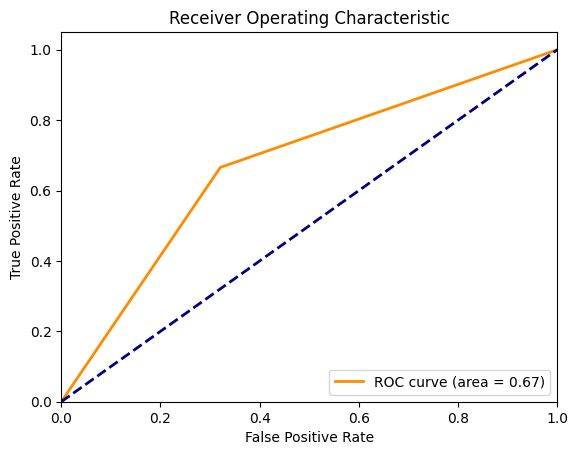

Feature Importances:
blueTeamFirstBlood: 0.007559420281370099
blueTeamControlWardsPlaced_diff: 0.047765161851069445
blueTeamWardsPlaced_diff: 0.07518398550529072
blueTeamTotalKills_diff: 0.03725173225192983
blueTeamDragonKills_diff: 0.031859399082498616
blueTeamHeraldKills_diff: 0.014193357218714023
blueTeamTowersDestroyed_diff: 0.024648343745871704
blueTeamInhibitorsDestroyed_diff: 0.0
blueTeamTurretPlatesDestroyed_diff: 0.04274713944974291
blueTeamMinionsKilled_diff: 0.07823707783107949
blueTeamJungleMinions_diff: 0.06790124472079395
blueTeamTotalGold_diff: 0.4041815417600096
blueTeamXp_diff: 0.08528201323031195
blueTeamTotalDamageToChamps_diff: 0.08318958307131782
Accuracy: 0.6725020644095788

F1 Score: 0.6692243536280233


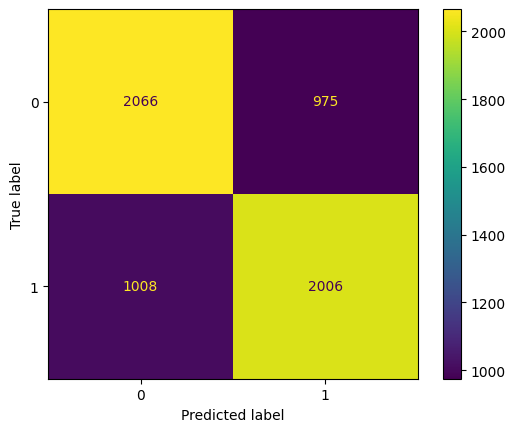

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, f1_score, ConfusionMatrixDisplay, accuracy_score

predictions = classifier.predict(testing_inputs)
conf_matrix = confusion_matrix(testing_classes, predictions)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(testing_classes, predictions))

# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(testing_classes, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
feature_importances = classifier.feature_importances_
print("Feature Importances:")
for i, feature in enumerate(column_names):
    print(f"{feature}: {feature_importances[i]}")

f1 = f1_score(testing_classes, predictions)

accuracy = accuracy_score(testing_classes, predictions)
print(f"Accuracy: {accuracy}")

print()
print(f"F1 Score: {f1}")

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()



